In [1]:
"""色々準備"""
from IPython.display import Image, display_png
import sympy
from sympy.physics.quantum import represent, qapply
from sympy.physics.quantum.qubit import Qubit, QubitBra, measure_all, measure_partial
from sympy.physics.quantum.gate import X,Y,Z,H,S,T,CNOT,SWAP,CPHASE,CGate,IdentityGate
from matplotlib.mathtext import math_to_image
sympy.init_printing() # ベクトルや行列を綺麗に表示するため

In [12]:
# Hゲートを通る
psi1 = Qubit(0,0,0,0)
qapply(psi1)

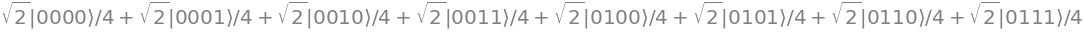

In [3]:
psi2 = qapply(H(0)*H(1)*H(2)*psi1)
qapply(psi2)

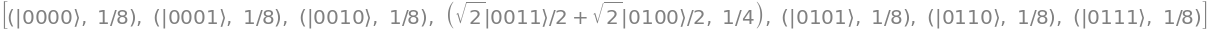

In [4]:
measure_partial(qapply(psi2), (0,1,2,3))

In [5]:
cx_000_gate = X(0)*X(1)*X(2)*CGate((0,1,2), X(3))*X(0)*X(1)*X(2)
cx_001_gate = X(1)*X(2)*CGate((0,1,2), X(3))*X(1)*X(2)
cx_010_gate = X(0)*X(2)*CGate((0,1,2), X(3))*X(0)*X(2)
cx_011_gate = X(2)*CGate((0,1,2), X(3))*X(2)
cx_100_gate = X(0)*X(1)*CGate((0,1,2), X(3))*X(0)*X(1)
cx_101_gate = X(1)*CGate((0,1,2), X(3))*X(1)
cx_110_gate = X(0)*CGate((0,1,2), X(3))*X(0)
cx_111_gate = CGate((0,1,2), X(3))

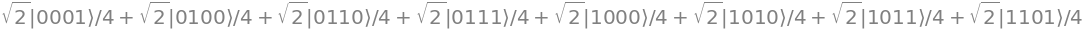

In [6]:
# ブラックボックス回路を通る
# [10100110]
# blackbox = cx_001_gate*cx_010_gate*cx_101_gate*cx_111_gate

# [10110100]
# blackbox = cx_010_gate*cx_100_gate*cx_101_gate*cx_111_gate

# [00101101]
blackbox = cx_000_gate*cx_010_gate*cx_011_gate*cx_101_gate

# [01010101] => -|0001>
# blackbox = cx_000_gate*cx_010_gate*cx_100_gate*cx_110_gate

# [10101010] => |0001>
# blackbox = cx_001_gate*cx_011_gate*cx_101_gate*cx_111_gate

# [11110000] => |0100>
# blackbox = cx_100_gate*cx_101_gate*cx_110_gate*cx_111_gate

# [00001111] => -|0100>
# blackbox = cx_000_gate*cx_001_gate*cx_010_gate*cx_011_gate

# [00111100]
# blackbox = cx_010_gate*cx_011_gate*cx_100_gate*cx_101_gate

# [00000000]
# blackbox = IdentityGate(0)

# [11111111]
# blackbox = X(3)

# [00000001]
# blackbox = cx_000_gate

psi3 = blackbox*psi2
qapply(psi3)

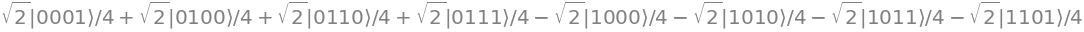

In [7]:
# Zゲートを通る
psi4 = Z(3)*psi3
qapply(psi4)

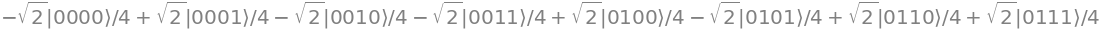

In [8]:
# 再度、ブラックボックス回路を通る
psi5 = blackbox*psi4
qapply(psi5)

In [9]:
# 再度、アダマールゲートを通る
psi6 = H(0)*H(1)*H(2)*psi5
qapply(psi6)

In [10]:
# 測定
result = measure_partial(qapply(psi6), (0,1,2))
result

In [11]:
result[0]